In [33]:
%matplotlib inline
from config_calc import *
import pandas as pd

import cesm_orcas_sci as cesm
import cam
import gv
import metpy.calc as mcalc

import plot_tools
import colorbrewer

import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'


In [2]:
%%time
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

tracer_def = cesm.trace_gas_tracers(case)
tracer_3d = [k for k in tracer_def]
varlist = ['CO2','CO2_OCN','Z3','Pm','theta']

ds = cesm.open_casedata(case,'atm','cam.h0',varlist,transformed='theta')

ds = ds.sel(time=slice('2016-01-15','2016-02-29'))

ds = cesm.convert_dataset(ds,case)

print('ds size {:0.2f}GB\n'.format(ds.nbytes / 1e9))
ds.info()

ds size 5.70GB

xarray.Dataset {
dimensions:
	lat = 192 ;
	lon = 288 ;
	time = 46 ;
	tlev = 56 ;

variables:
	float64 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
		time:bounds = time_bnds ;
	float64 CO2(time, tlev, lat, lon) ;
		CO2:mdims = 1 ;
		CO2:units = ppmv ;
		CO2:long_name = CO2 ;
		CO2:cell_methods = time: mean ;
	float64 tlev(tlev) ;
		tlev:units = K ;
		tlev:long_name = theta ;
	float64 CO2_OCN(time, tlev, lat, lon) ;
		CO2_OCN:mdims = 1 ;
		CO2_OCN:units = ppmv ;
		CO2_OCN:long_name = CO2_OCN ;
		CO2_OCN:cell_methods = time: mean ;
	float64 Z3(time, tlev, lat, lon) ;
		Z3:mdims = 1 ;
		Z3:units = m ;
		Z3:long_name = Geopotential Height (above sea level) ;
		Z3:cell_methods = time: mean ;
	float64 Pm(time, tlev, lat, lon) ;
		Pm:units = hPa ;
		Pm:long_name = Pressure (layer center) ;
		Pm:cell_methods = time: mean ;

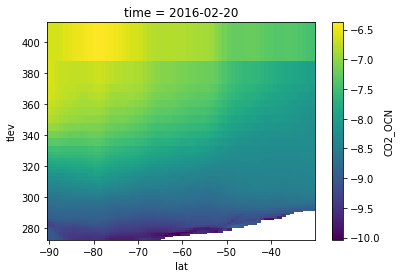

In [25]:
ds.CO2_OCN.sel(lat=slice(-90,-30),tlev=slice(400.,273.)).isel(time=-10).mean('lon').plot()

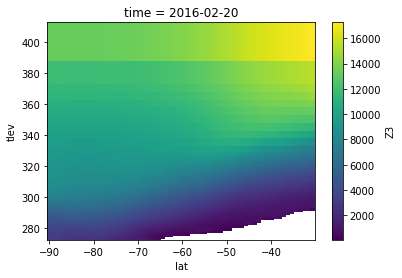

In [26]:
ds.Z3.sel(lat=slice(-90,-30),tlev=slice(400.,273.)).isel(time=-10).mean('lon').plot()

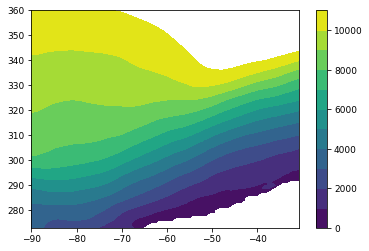

In [39]:
z = ds.Z3.sel(lat=slice(-90,-30),tlev=slice(360.,273.)).isel(time=-10).mean('lon')
levels = np.arange(0.,12000.,1000)
plt.contourf(z.lat,z.tlev,z,levels=levels,extend='neither')
plt.colorbar()

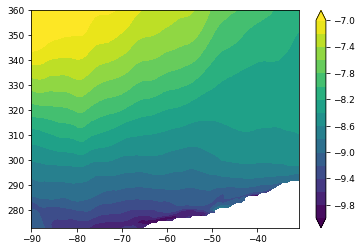

In [43]:
z = ds.CO2_OCN.sel(lat=slice(-90,-30),tlev=slice(360.,273.)).isel(time=-10).mean('lon')
levels = plot_tools.nice_levels(-10.,-7.,30,outside=False)
plt.contourf(z.lat,z.tlev,z,levels=levels,extend='both')
plt.colorbar()